## Exploratory data analysis -> Volcanoes on Venus

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [37]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory analysis on train dataset

**Labels**:  
- Volcano? -> (0/1) if there are volcanoes in the image
- Type -> 1= definitely a volcano,2 =probably, 3= possibly, 4= only a pit is visible [NaN if Volcano? is 0]
- Radius ->  is the radius of the volcan in the center of the image, in pixels [NaN if Volcano? is 0]
- Number Volcanoes -> The number of volcanoes in the image [NaN if Volcano? is 0]

In [5]:
train_images = pd.read_csv("./data/volcanoes_train/train_images.csv", header = None)/255
train_labels = pd.read_csv("./data/volcanoes_train/train_labels.csv")

In [7]:
train_labels.head()

Volcano?  Type  Radius  Number Volcanoes
0         1   3.0   17.46               1.0
1         0   NaN     NaN               NaN
2         0   NaN     NaN               NaN
3         0   NaN     NaN               NaN
4         0   NaN     NaN               NaN

In [16]:
# Proportions

print(f"Proportion of labels: {train_labels.loc[:,'Volcano?'].value_counts(1).to_dict()}")
print(f"Proportion of types: {train_labels.loc[:,'Type'].value_counts(1).to_dict()}")
print(f"Proportion of number of volcanoes: {train_labels.loc[:,'Number Volcanoes'].value_counts(1).to_dict()}")

Proportion of labels: {0: 0.8571428571428571, 1: 0.14285714285714285}
Proportion of types: {4.0: 0.362, 3.0: 0.346, 2.0: 0.187, 1.0: 0.105}
Proportion of number of volcanoes: {1.0: 0.814, 2.0: 0.147, 3.0: 0.03, 4.0: 0.007, 5.0: 0.002}


In [39]:
volcanoes_labels = train_labels.loc[train_labels['Volcano?'] == 1, :].copy()
volcanoes_labels['Type'] = volcanoes_labels['Type'].astype(int)
volcanoes_labels['Number Volcanoes'] = volcanoes_labels['Number Volcanoes'].astype(int)

### Plotting informations

In [40]:
# Radius distribution

fig = px.histogram(volcanoes_labels, x="Radius")
fig.show()

In [42]:
# Radius according to the type of the observation

fig = px.histogram(volcanoes_labels, x="Radius", color="Type", barmode="overlay")
fig.show()

In [45]:
# Does the number of Volcanoes impacts the type of the volcano?

fig = px.histogram(volcanoes_labels, x="Number Volcanoes", color="Type", barmode="group")
fig.show()

### Ploting the volcano images

#### Volcano x Not Volcano

In [74]:
is_volcano = train_labels.loc[train_labels['Volcano?'] == 1]
not_volcano = train_labels.loc[train_labels['Volcano?'] == 0]

In [80]:
volc_idx = list(is_volcano.sample(4).index)
notvolc_idx = list(not_volcano.sample(4).index)

volc_imgs = train_images.loc[volc_idx, :].values
notvolc_imgs = train_images.loc[notvolc_idx, :].values

volc_imgs = [np.array(img).reshape((110,110)) for img in volc_imgs]
notvolc_imgs = [np.array(img).reshape((110,110)) for img in notvolc_imgs]

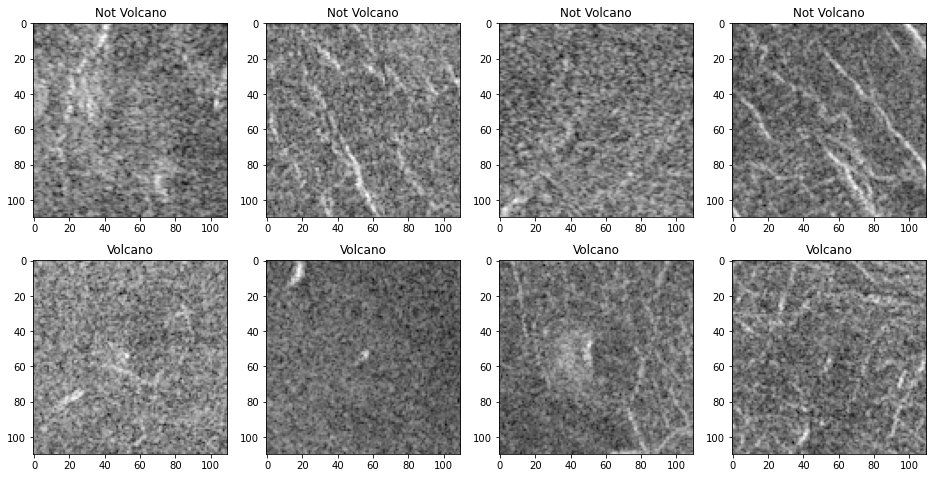

In [83]:
plt.figure(figsize=(16,8))

label = "Not Volcano"
for i, img in enumerate(notvolc_imgs):
    plt.subplot(2, 4, i+1)
    plt.title(label)
    plt.imshow(img, cmap = "gray")

label = "Volcano"
for i, img in enumerate(volc_imgs):
    plt.subplot(2, 4, i+5)
    plt.title(label)
    plt.imshow(img, cmap = "gray")

#### Number of volcanoes

In [90]:
n_vulc = train_labels['Number Volcanoes'].dropna().unique()
n_vulc.sort()

n_vulc_dict = {}
for n in n_vulc:
    filtered_df = train_labels.loc[train_labels['Number Volcanoes'] == n]
    if len(filtered_df) < 4:
        idx = list(filtered_df.index)
    
    else:
        idx = list(filtered_df.sample(4).index)
    
    imgs = train_images.loc[idx, :].values
    imgs = [np.array(img).reshape((110,110)) for img in imgs]

    n_vulc_dict[n] = imgs

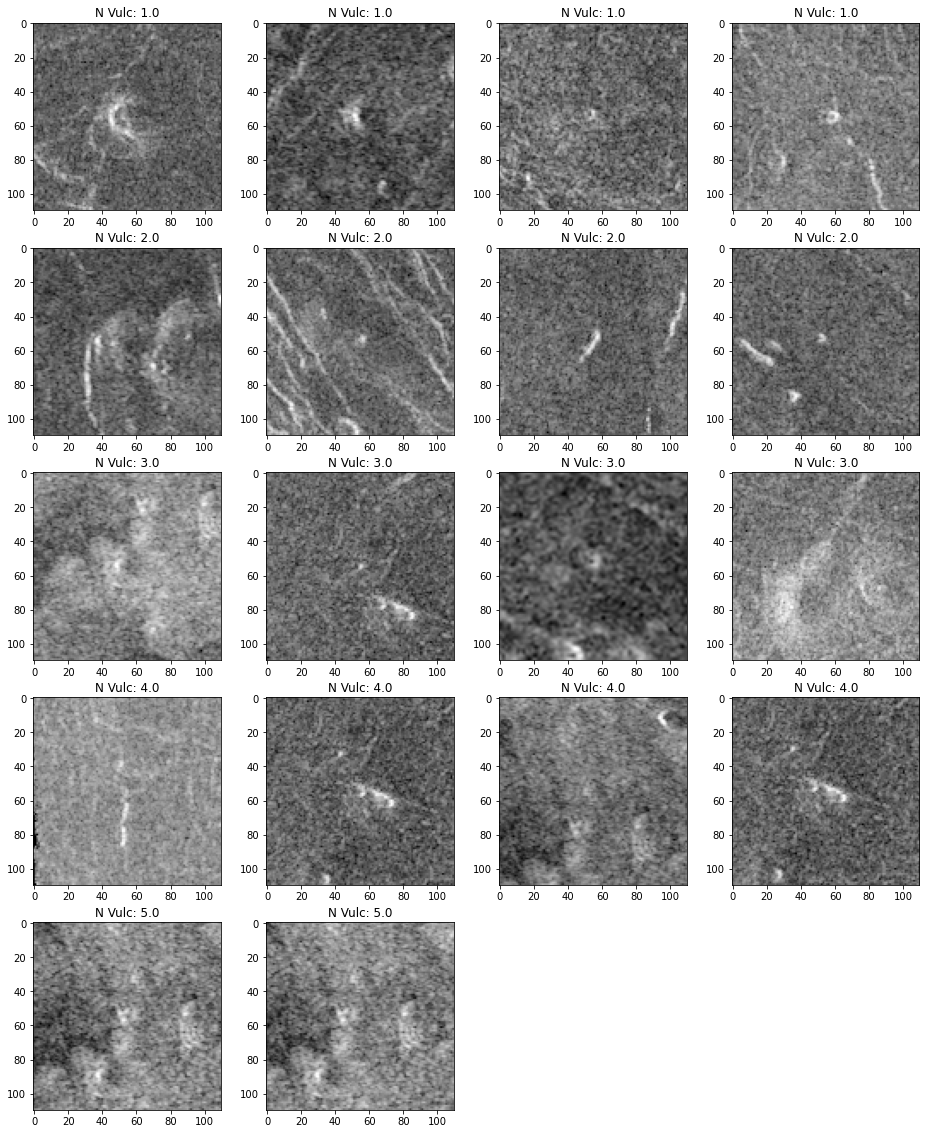

In [91]:
plt.figure(figsize=(16,20))

index_img = 1
for n_vulc in n_vulc_dict.keys():
    for img in n_vulc_dict[n_vulc]:
        plt.subplot(5, 4, index_img)
        plt.title(f"N Vulc: {n_vulc}")
        plt.imshow(img, cmap = "gray")
        index_img +=1

plt.show()

#### Type of the vulcano

In [92]:
type_vulc = train_labels['Type'].dropna().unique()
type_vulc.sort()

type_vulc_dict = {}
for t in type_vulc:
    filtered_df = train_labels.loc[train_labels['Type'] == t]
    if len(filtered_df) < 4:
        idx = list(filtered_df.index)
    
    else:
        idx = list(filtered_df.sample(4).index)
    
    imgs = train_images.loc[idx, :].values
    imgs = [np.array(img).reshape((110,110)) for img in imgs]

    type_vulc_dict[t] = imgs

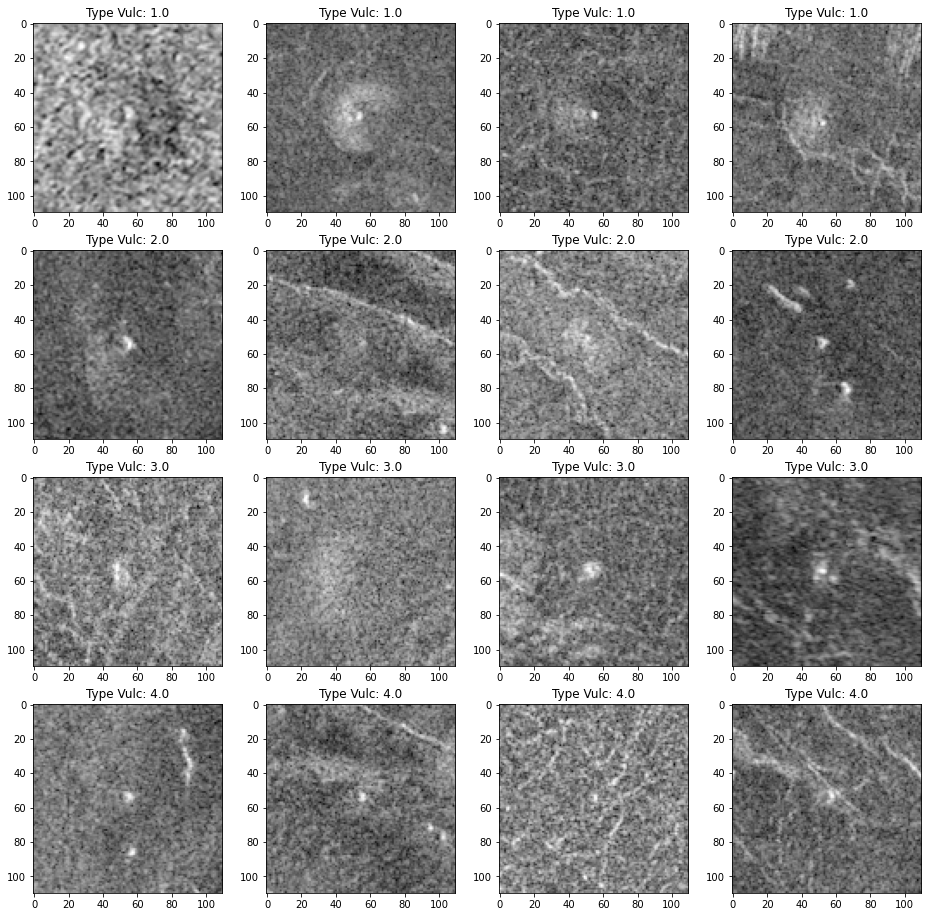

In [95]:
plt.figure(figsize=(16,16))

index_img = 1
for type_vulc in type_vulc_dict.keys():
    for img in type_vulc_dict[type_vulc]:
        plt.subplot(4, 4, index_img)
        plt.title(f"Type Vulc: {type_vulc}")
        plt.imshow(img, cmap = "gray")
        index_img +=1

plt.show()